In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_card_dataset = pd.read_csv('creditcard.csv')

In [3]:
credit_card_dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
credit_card_dataset.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#dataset information
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
credit_card_dataset['Amount']= sc.fit_transform(pd.DataFrame(credit_card_dataset['Amount']))

In [9]:
credit_card_dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0


In [10]:
credit_card_dataset = credit_card_dataset.drop(['Time'],axis=1)

In [11]:
credit_card_dataset.shape

(284807, 30)

In [12]:
credit_card_dataset.duplicated().any()

True

In [13]:
credit_card_dataset=  credit_card_dataset.drop_duplicates()

In [14]:
credit_card_dataset.shape

(275663, 30)

In [15]:
#distribution of legit transaction and frarudulent teansaction
credit_card_dataset['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

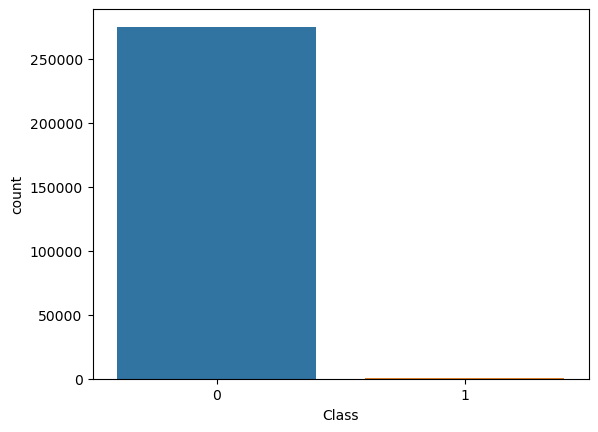

In [17]:
# Assuming 'credit_card_dataset' is your DataFrame
sns.countplot(data=credit_card_dataset, x='Class')

In [18]:
x = credit_card_dataset.drop('Class',axis=1)
y = credit_card_dataset['Class']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(275663, 29) (220530, 29) (55133, 29)


In [21]:
### underSampling 

normal = credit_card_dataset[credit_card_dataset['Class']==0]
fraud = credit_card_dataset[credit_card_dataset['Class']==1]

In [22]:
normal.shape

(275190, 30)

In [23]:
fraud.shape

(473, 30)

In [24]:
normal_sample=normal.sample(n=473)

In [25]:
normal_sample.shape

(473, 30)

In [26]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [27]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [28]:
new_data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.109514,0.110815,0.204384,1.038066,-0.510995,-0.606276,-0.192228,0.062885,0.402344,-0.596969,...,-0.111613,-0.183938,-0.090763,0.459554,0.463804,0.381523,-0.009212,0.036649,-0.235046,0
1,1.490736,-0.945236,0.730620,-1.340281,-1.645477,-0.892924,-1.011804,-0.225394,-1.868495,1.386344,...,-0.355341,-0.644846,0.164092,0.363373,0.157801,-0.413909,0.047352,0.032820,-0.275267,0
2,1.613048,-0.625053,-1.382837,0.324384,0.930604,1.646929,-0.234099,0.403719,1.609543,-0.388555,...,-0.163843,-0.260336,0.349808,-0.633868,-0.602170,0.298739,-0.061837,-0.067172,0.134137,0


In [29]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
#LOGISTICREGRESSION


from  sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred1= log.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred1)

0.9315789473684211

In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [35]:
precision_score(y_test,y_pred1)

0.9587628865979382

In [36]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [37]:
f1_score(y_test,y_pred1)

0.9346733668341709

In [38]:
## DECISIONTREE 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred2 = dt.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8947368421052632

In [41]:
precision_score(y_test,y_pred2)

0.8727272727272727

In [42]:
recall_score(y_test,y_pred2)

0.9411764705882353

In [43]:
f1_score(y_test,y_pred1)

0.9346733668341709

In [44]:
## RANDOMFOREST 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred3 = dt.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.8947368421052632

In [47]:
precision_score(y_test,y_pred3)

0.8727272727272727

In [48]:
recall_score(y_test,y_pred3)

0.9411764705882353

In [49]:
f1_score(y_test,y_pred3)

0.9056603773584905

In [50]:
final_data = pd.DataFrame({'Model':['LR','DT','RF'],"ACC":[accuracy_score(y_test,y_pred1)*100,
                                              accuracy_score(y_test,y_pred2)*100,
                                              accuracy_score(y_test,y_pred3)*100
                                             ]})


In [51]:
final_data

,Model,ACC
0,LR,93.157895
1,DT,89.473684
2,RF,89.473684


<AxesSubplot:xlabel='Model', ylabel='ACC'>

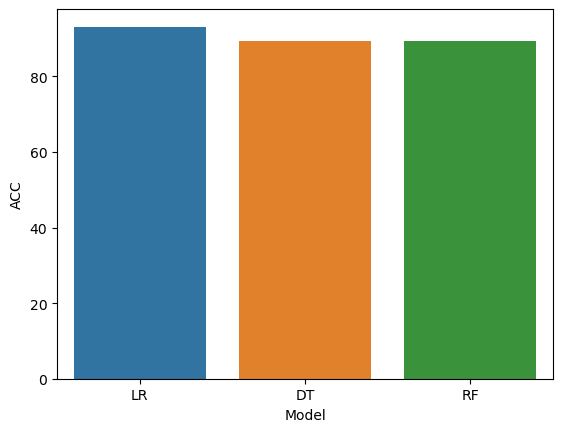

In [52]:
sns.barplot(data=final_data, x='Model', y='ACC')

In [53]:
## OVERSAMPLING

X = credit_card_dataset.drop('Class',axis=1)
y = credit_card_dataset['Class']

In [54]:
X.shape

(275663, 29)

In [55]:
y.shape

(275663,)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [58]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [60]:
## Logistic Regression
log = LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [61]:
y_pred1 = log.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred1)

0.9443929648606417

In [63]:
precision_score(y_test,y_pred1)


0.9729661738524653

In [64]:
recall_score(y_test,y_pred1)

0.9141137756122394

In [65]:
f1_score(y_test,y_pred1)

0.9426222593012683

In [66]:
### Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred2 = dt.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred2)

0.998128565718231

In [69]:
precision_score(y_test,y_pred2)

0.9970249433106576

In [70]:
recall_score(y_test,y_pred2)

0.9992364052869843

In [71]:
f1_score(y_test,y_pred2)

0.9981294493680082

In [72]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
y_pred3 = rf.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred3)

0.9999091536756423

In [75]:
precision_score(y_test,y_pred3)

0.9998363963570922

In [76]:
recall_score(y_test,y_pred3)

0.9999818191734996

In [77]:
f1_score(y_test,y_pred3)

0.9999091024778664

In [78]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [79]:
final_data

,Models,ACC
0,LR,94.439296
1,DT,99.812857
2,RF,99.990915


<AxesSubplot:xlabel='Models', ylabel='ACC'>

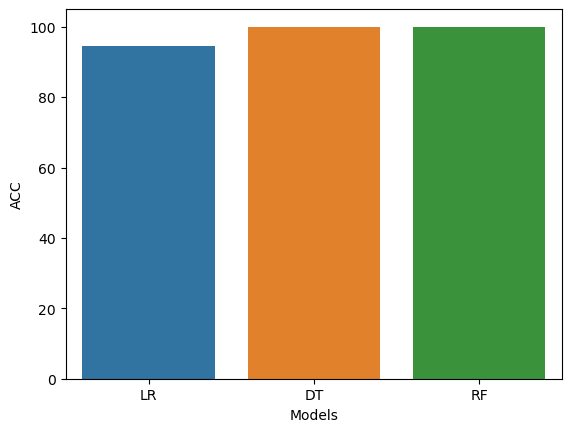

In [80]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [81]:
###Save The Model

rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [82]:
import joblib

In [83]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [84]:
model = joblib.load("credit_card_model")

In [85]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [86]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [87]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y_test, y_pred1)
roc_auc2 = roc_auc_score(y_test, y_pred2)
roc_auc3 = roc_auc_score(y_test, y_pred3)

In [88]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "roc_auc_score":[(roc_auc1),
                     (roc_auc2),
                     (roc_auc3)
                    ]})

print(final_data);

  Models  roc_auc_score
0     LR       0.944374
1     DT       0.998129
2     RF       0.999909
